# Supervised Learning
## Project: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** Classification Problem because we need to classify from all the students that who need intervention and who does not.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print ("Student data read successfully!")

Student data read successfully!


In [25]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns) - 1

# TODO: Calculate passing students
n_passed = len(student_data[student_data["passed"] == "yes"])

# TODO: Calculate failing students
n_failed = len(student_data[student_data["passed"] == "no"])

# TODO: Calculate graduation rate
grad_rate = (n_passed / n_students) * 100

# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

## Dataset Details :

Detailed information about the feature used in the dataset:-
-  
`school` : student's school (binary: "GP" or "MS")
- 
`sex` : student's sex (binary: "F" - female or "M" - male)
- 
`age` : student's age (numeric: from 15 to 22)
- 
`address` : student's home address type (binary: "U" - urban or "R" - rural)
- 
`famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- 
`Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- 
`Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- 
`Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- 
`Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- 
`Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- 
`reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- 
`guardian` : student's guardian (nominal: "mother", "father" or "other")
- 
`traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 
`studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 
`failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- 
`famsup` : family educational support (binary: yes or no)
-
`paid` : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 
`activities` : extra-curricular activities (binary: yes or no)
- 
`nursery` : attended nursery school (binary: yes or no)
- 
`higher` : wants to take higher education (binary: yes or no)
- 
`internet` : Internet access at home (binary: yes or no)
- 
`romantic` : with a romantic relationship (binary: yes or no)
- 
`famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 
`freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- 
`goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- 
`Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 
`Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 
`health` : current health status (numeric: from 1 - very bad to 5 - very good)
- 
`absences` : number of school absences (numeric: from 0 to 93)
- 
`passed` : did the student pass the final exam (binary: yes or no)


In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())
print(X_all.info())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import any additional functionality you may need here

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train = X_all[:num_train]
y_train = y_all[:num_train]
X_test = X_all[num_train:]
y_test = y_all[num_train:]

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: ** 

**Support Vector Machines Classifier (SVM)**

**Overview**: <br>
SVM classifies samples by a separating hyperplane. It is flexible with non-traditional data input, eg. string, which makes it versatile in many applications, such as, text classification, image classification, bioinformatics (protein classification, cancer classification) and hand-written character classification. The time and space complexity of SVM classifier are both O(n<sup>3</sup>) where n is the sample size<sup>[2]</sup>.

**Pros**<sup>[3,4]</sup>:<br>
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
- Overfitting can be controlled by using soft margin.
- No local minima in doing the convex optimization.

**Cons**<sup>[3]</sup>:<br>
- If the number of features is much greater than the number of samples, the method is likely to give poor performances.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.
- Sensitive to noisy (mis-labeled) data.
- The classification results can be very sensitive to the selection of kernel which makes the choice of kernel crucial.
- Poor performance on multiclass classification.
- Poor performance on highly skewed/imbalanced data sets.

**Why Chosen**:<br>
Considering the target dataset is relatively small, the cost of computation is not a crucial factor, hence SVM is worth trying.

[1][Core Vector Machines: Fast SVM Training on Very Large Data Sets](http://machinelearning.wustl.edu/mlpapers/paper_files/TsangKC05.pdf)<br>
[2][Introduction to Support Vector Machines](http://www.cs.rutgers.edu/~mlittman/courses/ml04/svm.pdf)<br>
[3][Support Vector Machines by Andrew W. Moore](http://www.autonlab.org/tutorials/svm15.pdf)<br>

---
**Decision Trees Classifier (DT)**<br>

**Overview**:<br>
DT classifies samples with a tree-like model based on a set of if-then-else decision rules. The standard Decision Tree classifier has a time complexity of O(nm<sup>3</sup>) and a space complexity of O(n) where n is the number of samples and m is the number of features<sup>[7]</sup>. Applications of DT include: star classification, medical diagnosis, credit risk analysis.

**Pros**<sup>[7]</sup>:<br>
- Easy to understand and interpret. 
- Fast and accurate.
- Robust to noise and missing values.

**Cons**:<br>
- Doesn't treat well non-rectangular regions.
- Prone to overfitting. 

**Why Chosen**:<br>
Let's also try DT to get an overall comparison of single estimators.

[4][A Fast Decision Tree Learning Algorithm](http://aaaipress.org/Papers/AAAI/2006/AAAI06-080.pdf)<br>

---
**Stochastic Gradient Descent Classifier (SGD)**<br>

**Overview**<sup>[10]</sup>:<br>
SGD classifies samples by minimizing an objective function, often a loss function, by iteration. SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing.

**Pros**:<br>
- Scales well with sample size larger than 10<sup>5</sup>.
- Efficiency.

**Cons**:<br>
- Requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- Sensitive to feature scaling.

**Why Chosen**:<br>
For checking if it Perform well even if dataset too small.

[5][scikit-learn: 1.5. Stochastic Gradient Descent](http://scikit-learn.org/stable/modules/sgd.html)<br>

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [26]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))
    return (end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return [f1_score(target.values, y_pred, pos_label='yes'), (end - start)]


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .\n".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_time = train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    predict_train = predict_labels(clf, X_train, y_train)
    print ("F1 score for training set: {:.4f}.".format(predict_train[0]))
    
    predict_test = predict_labels(clf, X_test, y_test)
    print ("F1 score for test set: {:.4f}.".format(predict_test[0]))
    
    return train_time, predict_train, predict_test

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [31]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
# from sklearn import model_B
# from sklearn import model_C
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = SVC(random_state=0)
clf_C = GradientBoostingClassifier(random_state=0)

# TODO: Set up the training set sizes
X_train_100 = X_train[0:100]
y_train_100 = y_train[0:100]

X_train_200 = X_train[0:200]
y_train_200 = y_train[0:200]

X_train_300 = X_train[0:300]
y_train_300 = y_train[0:300]

clf_A_train_time = []
clf_A_train_score = []
clf_A_predict_train_time = []
clf_A_test_score = []
clf_A_predict_test_time = []

clf_B_train_time = []
clf_B_train_score = []
clf_B_predict_train_time = []
clf_B_test_score = []
clf_B_predict_test_time = []

clf_C_train_time = []
clf_C_train_score = []
clf_C_predict_train_time = []
clf_C_test_score = []
clf_C_predict_test_time = []

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
print("\n Results in 100 training Data Points:\n")
train_time, predict_train, predict_test = train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
clf_A_train_time.append(train_time)
clf_A_train_score.append(predict_train[0])
clf_A_predict_train_time.append(predict_train[1])
clf_A_test_score.append(predict_test[0])
clf_A_predict_test_time.append(predict_test[1])

print("\n")
train_time, predict_train, predict_test = train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
clf_B_train_time.append(train_time)
clf_B_train_score.append(predict_train[0])
clf_B_predict_train_time.append(predict_train[1])
clf_B_test_score.append(predict_test[0])
clf_B_predict_test_time.append(predict_test[1])

print("\n")
train_time, predict_train, predict_test = train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
clf_C_train_time.append(train_time)
clf_C_train_score.append(predict_train[0])
clf_C_predict_train_time.append(predict_train[1])
clf_C_test_score.append(predict_test[0])
clf_C_predict_test_time.append(predict_test[1])

print("\n Results in 200 training Data Points:\n")
train_time, predict_train, predict_test = train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
clf_A_train_time.append(train_time)
clf_A_train_score.append(predict_train[0])
clf_A_predict_train_time.append(predict_train[1])
clf_A_test_score.append(predict_test[0])
clf_A_predict_test_time.append(predict_test[1])

print("\n")
train_time, predict_train, predict_test = train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
clf_B_train_time.append(train_time)
clf_B_train_score.append(predict_train[0])
clf_B_predict_train_time.append(predict_train[1])
clf_B_test_score.append(predict_test[0])
clf_B_predict_test_time.append(predict_test[1])

print("\n")
train_time, predict_train, predict_test = train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
clf_C_train_time.append(train_time)
clf_C_train_score.append(predict_train[0])
clf_C_predict_train_time.append(predict_train[1])
clf_C_test_score.append(predict_test[0])
clf_C_predict_test_time.append(predict_test[1])

print("\n Results in 300 training Data Points:\n")
train_time, predict_train, predict_test = train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
clf_A_train_time.append(train_time)
clf_A_train_score.append(predict_train[0])
clf_A_predict_train_time.append(predict_train[1])
clf_A_test_score.append(predict_test[0])
clf_A_predict_test_time.append(predict_test[1])

print("\n")
train_time, predict_train, predict_test = train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
clf_B_train_time.append(train_time)
clf_B_train_score.append(predict_train[0])
clf_B_predict_train_time.append(predict_train[1])
clf_B_test_score.append(predict_test[0])
clf_B_predict_test_time.append(predict_test[1])

print("\n")
train_time, predict_train, predict_test = train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)
clf_C_train_time.append(train_time)
clf_C_train_score.append(predict_train[0])
clf_C_predict_train_time.append(predict_train[1])
clf_C_test_score.append(predict_test[0])
clf_C_predict_test_time.append(predict_test[1])


 Results in 100 training Data Points:

Training a DecisionTreeClassifier using a training set size of 100. . .

Trained model in 0.0020 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6102.


Training a SVC using a training set size of 100. . .

Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8772.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7975.


Training a GradientBoostingClassifier using a training set size of 100. . .

Trained model in 0.0826 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.5983.

 Results in 200 training Data Points:

Training a DecisionTreeClassifier using a training set size of 200. . .

Trained model in 0.0020 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0005

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - clf_A (Decision Tree)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0020          |         0.0000         |      1.0000      |      0.6102     |
| 200               |         0.0020          |         0.0000         |      1.0000      |      0.5556     |
| 300               |         0.0030          |         0.0000         |      1.0000      |      0.6333     |

** Classifer 2 - clf_B (Support Vector Machine)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0020             |        0.0020          |     0.8772       |      0.7975     |
| 200               |      0.0050             |        0.0020          |     0.8474       |      0.8026     |
| 300               |      0.0100             |        0.0030          |     0.8686       |      0.7571     |

** Classifer 3 - clf_C (GradientBoostingClassifier)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0971              |       0.0000           |      1.0000      |      0.5983     |
| 200               |     0.1251              |       0.0010           |      0.9892      |      0.6240     |
| 300               |     0.1311              |       0.0010           |      0.9663      |      0.6880     |

** (Note : Training and Prediction Time may changed) **

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** 

Visualising the result:

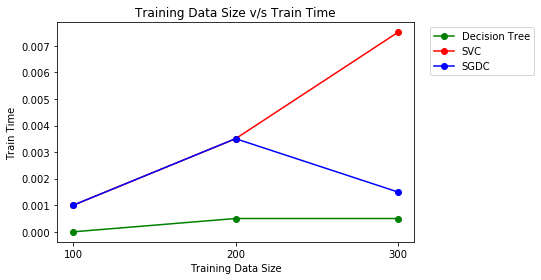

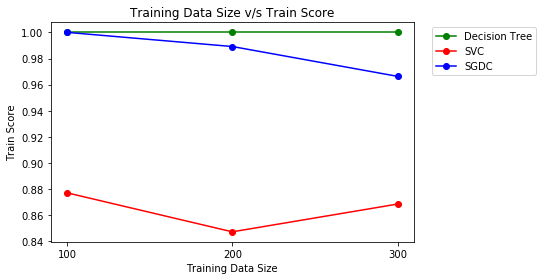

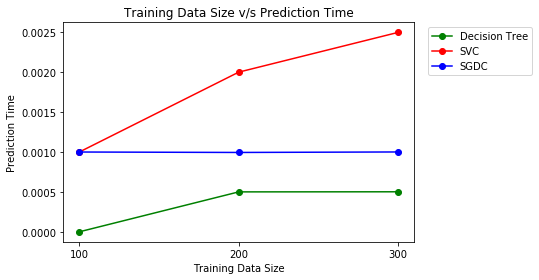

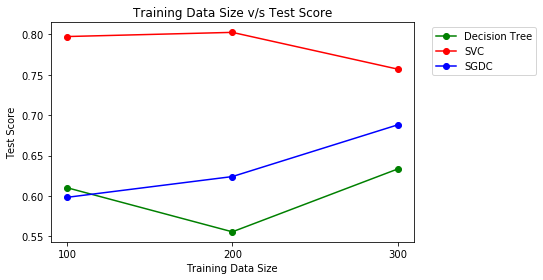

In [34]:
import matplotlib.pyplot as plt

size = [100, 200, 300]

def plot_train_time():
    plt.plot(size, clf_A_predict_train_time, 'o-',lw = 1.5, color='green', label='Decision Tree')
    plt.plot(size, clf_B_predict_train_time, 'o-',lw = 1.5, color='red', label='SVC')
    plt.plot(size, clf_C_predict_train_time, 'o-',lw = 1.5, color='blue', label='SGDC')
    plt.xlabel('Training Data Size')
    plt.ylabel('Train Time')
    plt.xticks([100, 200, 300])
    plt.title('Training Data Size v/s Train Time')
    plt.legend(bbox_to_anchor=(1.35, 1), loc = 'upper right')
    plt.tight_layout()
    plt.show()

def plot_train_score():
    plt.plot(size, clf_A_train_score, 'o-',lw = 1.5, color='green', label='Decision Tree')
    plt.plot(size, clf_B_train_score, 'o-',lw = 1.5, color='red', label='SVC')
    plt.plot(size, clf_C_train_score, 'o-',lw = 1.5, color='blue', label='SGDC')
    plt.xlabel('Training Data Size')
    plt.ylabel('Train Score')
    plt.xticks([100, 200, 300])
    plt.title('Training Data Size v/s Train Score')
    plt.legend(bbox_to_anchor=(1.35, 1), loc = 'upper right')
    plt.tight_layout()
    plt.show()

def plot_predict_time():
    plt.plot(size, clf_A_predict_test_time, 'o-',lw = 1.5, color='green', label='Decision Tree')
    plt.plot(size, clf_B_predict_test_time, 'o-',lw = 1.5, color='red', label='SVC')
    plt.plot(size, clf_C_predict_test_time, 'o-',lw = 1.5, color='blue', label='SGDC')
    plt.xlabel('Training Data Size')
    plt.ylabel('Prediction Time')
    plt.xticks([100, 200, 300])
    plt.title('Training Data Size v/s Prediction Time')
    plt.legend(bbox_to_anchor=(1.35, 1), loc = 'upper right')
    plt.tight_layout()
    plt.show()

def plot_test_score():
    plt.plot(size, clf_A_test_score, 'o-',lw = 1.5, color='green', label='Decision Tree')
    plt.plot(size, clf_B_test_score, 'o-',lw = 1.5, color='red', label='SVC')
    plt.plot(size, clf_C_test_score, 'o-',lw = 1.5, color='blue', label='SGDC')
    plt.xlabel('Training Data Size')
    plt.ylabel('Test Score')
    plt.xticks([100, 200, 300])
    plt.title('Training Data Size v/s Test Score')
    plt.legend(bbox_to_anchor=(1.35, 1), loc = 'upper right')
    plt.tight_layout()
    plt.show()

plot_train_time()
plot_train_score()
plot_predict_time()
plot_test_score()

As from the result which we have obtained Support Vector Classifier seems to be best match for our dataset because unlike Decision Tree and SGDC, it does not overfit the training data due to which our test score in case of SVC in all cases(100, 200, 300) is greater than Decision Tree and SGDC. And our dataset is small so cost is also small.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [29]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'C':[0.01, 0.1, 1, 10],
              'gamma':[0.001, 0.01, 0.1, 1, 10],
              'kernel':['rbf', 'linear'],
              'class_weight': [None, 'balanced']}

# TODO: Initialize the classifier
clf = SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(score_func=f1_score, pos_label = 'yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)[0]))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)[0]))
print (clf)

Made predictions in 0.0060 seconds.
Tuned model has a training F1 score of 0.8301.
Made predictions in 0.0025 seconds.
Tuned model has a testing F1 score of 0.7832.
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Question 4 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** 

| Model | F1 Score(Train) | F1 Score(Test) |
| :---: | :-------------: | :------------: |
| UnTuned Model | 0.8686  | 0.7571 |
| Tuned Model   | 0.8301  | 0.7832 |

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.